# Homework 12

- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
- compare to sklearn implementation

In [1]:
import numpy as np
import pandas as pd
import random
#import os
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(21)
%matplotlib inline

In [2]:
# Simple accuracy function

def accuracy( predicted, original):
    counter = 0   
    for i in range(len (predicted)):
        if predicted[i] == original[i]:
            counter = counter + 1
    return  (counter / len(predicted))

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 2)

In [14]:
per_clf = Perceptron(tol=0.00001, random_state = 3 )
per_clf.fit(X_train, y_train, coef_init = [1,1], intercept_init = -100)

predicted = per_clf.predict(X_test)
print('Accyracy - train data: ', per_clf.score(X_train, y_train))
print('Accyracy - test data: ', accuracy(predicted, y_test) )
print('Number of iterations: ', per_clf.n_iter_)

print('Weights assigned to the features: ', per_clf.coef_)
print('Constants in decision function: ', per_clf.intercept_ ) 

w1 = per_clf.coef_[0][0]
w2 = per_clf.coef_[0][1]
w0 = per_clf.coef_[0][0]

# TO DO:   decission boundry of your trained Perceptron

Accyracy - train data:  1.0
Accyracy - test data:  1.0
Number of iterations:  20
Weights assigned to the features:  [[  3.2 -27.8]]
Constants in decision function:  [12.]


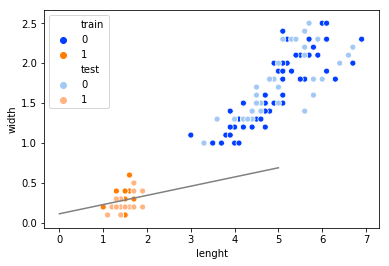

In [15]:
df_train = pd.DataFrame(X_train, columns = ['lenght', 'width'])
df_train['train'] = y_train
df_test = pd.DataFrame(X_test, columns = ['lenght', 'width'])
df_test['test'] = y_test

x = np.linspace(0, 5, num= 5)
#ax = sns.lineplot(x, -(w0 + w1*x)/w2, color = 'gray' ) TO DO - line

ax = sns.scatterplot(x="lenght", y="width", hue="train", palette = 'bright', data=df_train)
ax = sns.scatterplot(x="lenght", y="width", hue="test", palette = 'pastel', data=df_test)
